## SVM Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

df = pd.read_csv('../../data/cleaned data/Suicidal Behaviours Among Adolescents.csv')
df = df.drop(['Country','Year','Sex'],axis=1)
df = df.dropna(how='any',axis=0) 
df = df.replace({'13-15':'1','16-17':'2'})

In [2]:
df

,Age Group,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
4,1,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
5,1,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
8,1,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
9,1,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
10,2,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,1,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,1,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,2,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


In [3]:
x = df['Bullied'].values.reshape(-1,1)
y = df['Attempted_suicide'].values.reshape(-1,1)

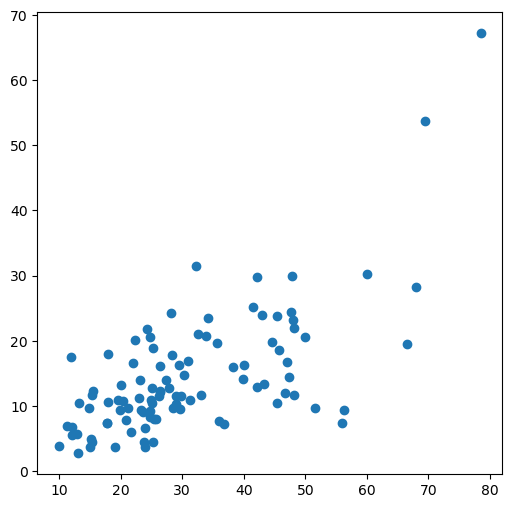

In [4]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x,y)

/Users/elliotli/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


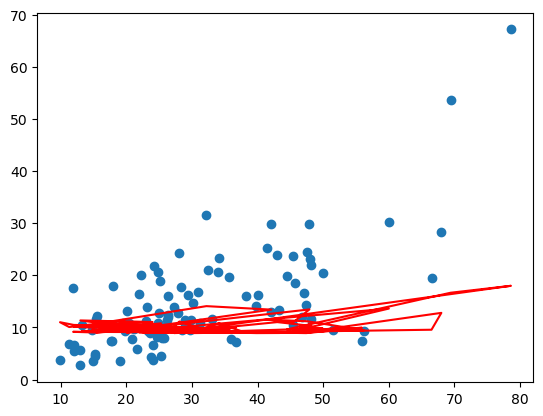

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)
plt.scatter(x,y)
plt.plot(x,regressor.predict(y),color = 'red')